In [1]:
# from pymasker import LandsatMasker
# from pymasker import LandsatConfidence

# # load the QA band directly
# #
# # The "collection" parameter is required for landsat to specify the collection
# # number. Acceptable number: 0 (pre-collection), 1 (collection-1)
# #
# masker = LandsatMasker(r'..\Data\raw sat images-2014-2019\LC08_L1TP_036025_20170403_20170414_01_T1\LC08_L1TP_036025_20170403_20170414_01_T1_BQA.TIF', collection=1)

# # algorithm has high confidence that this condition exists
# # (67-100 percent confidence)
# conf = LandsatConfidence.low

# # Get mask indicating cloud pixels with high confidence
# mask = masker.get_snow_mask(conf)

# # save the result
# masker.save_tif(mask, 'result10.tif')

In [2]:
# Run this code in conda environment "MDN" to make MDN part working correctly.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#pd.set_option('display.max_rows' ,1000)

#  field chla data preparation

In [5]:
field_data = pd.read_csv('../Data/BP_data.csv', skiprows=[1], parse_dates=['Date'], index_col= 'SampleID')
field_data

,Dataset,Date,Time,SiteNumber,latitude,Longitude,BottomDepth,sampledepth,SecchiDiskDepth,SamplingInScum,...,Diatom_Synedra,Diatom_Cocconeis,Diatom_Nitzchia,Diatom_Navicula,Diatom_Fragillaria,Diatom_Tabellaria,Diatom_Gomphenema,Diatom_Astrionella,Flagellates,Other
SampleID,,,,,,,,,,,,,,,,,,,,,
1,Buoy,2014-06-11,6:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Buoy,2014-06-11,6:30:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Buoy,2014-06-11,6:45:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Buoy,2014-06-11,7:00:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Buoy,2014-06-11,7:15:00 PM,1,50.586139,-105.384833,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110085,Calibration,2019-08-30,11:37:00 AM,1,50.586139,-105.384833,4.3,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110086,Calibration,2019-09-03,12:05:00 PM,1,50.586139,-105.384833,4.3,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110087,Calibration,2019-09-03,12:05:00 PM,1,50.586139,-105.384833,4.3,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#buoy calibration
filt_dataset = field_data['Dataset'] == 'Buoy'
field_data.loc[filt_dataset, 'Lab_Chla'] = (5 * field_data[filt_dataset]['BGAPCShallowRFU']) ** (100/99)
field_data['Lab_Chla'].head()

SampleID
1    18.533269
2    17.493540
3    16.454429
4    19.053354
5    16.454429
Name: Lab_Chla, dtype: float64

In [7]:
# drop the buoy observations associated with biofouling error
field_data = field_data[field_data['shallow_sonde_biofouling_outlier'] != 1].copy()
# drop the associated column 
field_data.drop('shallow_sonde_biofouling_outlier', axis=1, inplace=True)

In [8]:
# drop the lab observations labeld as error
field_data = field_data[field_data.Lab_chlaOutlier != 1].copy()
# drop the associated column 
field_data.drop('Lab_chlaOutlier', axis=1, inplace=True)
field_data.shape

(108778, 102)

In [9]:
# drop the observations containing bottom signal
field_data = field_data[~(field_data.SecchiDiskDepth >= field_data.BottomDepth)].copy()
field_data.shape

(108754, 102)

In [10]:
# averaging field chla data over date and station
chl_data = field_data.groupby(['Date', 'SiteNumber', 'latitude', 'Longitude']).agg({'Lab_Chla' :'median'})
chl_data

,,,,Lab_Chla
Date,SiteNumber,latitude,Longitude,
2014-01-06,2,50.585203,-105.385823,NaN
2014-01-13,2,50.585203,-105.385823,6.000000
2014-01-20,2,50.585203,-105.385823,NaN
2014-01-27,2,50.585203,-105.385823,7.000000
2014-02-03,2,50.585203,-105.385823,NaN
...,...,...,...,...
2019-09-29,1,50.586139,-105.384833,38.898296
2019-09-30,1,50.586139,-105.384833,39.946201
2019-10-01,1,50.586139,-105.384833,39.946201


In [11]:
# drop (dates,stations) with no chla measured
chl_data.dropna(axis=0, inplace=True)
chl_data

,,,,Lab_Chla
Date,SiteNumber,latitude,Longitude,
2014-01-13,2,50.585203,-105.385823,6.000000
2014-01-27,2,50.585203,-105.385823,7.000000
2014-02-10,2,50.585203,-105.385823,19.000000
2014-02-24,2,50.585203,-105.385823,14.000000
2014-03-10,2,50.585203,-105.385823,8.000000
...,...,...,...,...
2019-09-29,1,50.586139,-105.384833,38.898296
2019-09-30,1,50.586139,-105.384833,39.946201
2019-10-01,1,50.586139,-105.384833,39.946201


In [12]:
chl_data.reset_index(level=['Date', 'SiteNumber', 'latitude', 'Longitude'], inplace=True)
chl_data.index
chl_data.dtypes

Date          datetime64[ns]
SiteNumber             int64
latitude             float64
Longitude            float64
Lab_Chla             float64
dtype: object

# Extract satelite data

In [13]:
# create a dataframe for images in the directory
import os, fnmatch

listOfFiles = os.listdir('../Data/Processed_sat-2014-2019-2')
pattern = "S2*_L2W.nc"
img_list = []
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            img_list.append(entry)

if fnmatch.fnmatch(pattern, 'S2*'):
    img_dates = [i[8:18] for i in img_list] #for S2
elif fnmatch.fnmatch(pattern, 'L8*'):
    img_dates = [i[7:17] for i in img_list] #for L8
    
number_of_images = len(img_list)
sat_dates = pd.DataFrame(data = img_dates, columns = ['Date'], index = range(0, number_of_images))
sat_dates['#img'] = range(0, number_of_images)
sat_dates.head()
sat_dates

,Date,#img
0,2017_04_08,0
1,2017_04_15,1
2,2017_04_28,2
3,2017_05_05,3
4,2017_05_18,4
...,...,...
67,2019_09_07,67
68,2019_09_20,68
69,2019_10_07,69
70,2019_10_20,70


In [14]:
sat_dates.sort_values('Date',inplace = True)
sat_dates.head

<bound method NDFrame.head of           Date  #img
0   2017_04_08     0
1   2017_04_15     1
2   2017_04_28     2
3   2017_05_05     3
4   2017_05_18     4
..         ...   ...
41  2019_10_05    41
69  2019_10_07    69
70  2019_10_20    70
42  2019_10_22    42
71  2019_10_30    71

[72 rows x 2 columns]>

In [15]:
sat_dates['Date'] = pd.to_datetime(sat_dates['Date'], format='%Y_%m_%d')

In [16]:
# create a dataframe from merging chla data and image names (based on same date)
merged_data = pd.merge_asof(chl_data.rename(columns={'Date':'Date_insitu'}), sat_dates.rename(columns={'Date':'Date_sat'}), left_on='Date_insitu', right_on='Date_sat',direction='nearest',tolerance=pd.Timedelta('3d'))
merged_data

,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img
0,2014-01-13,2,50.585203,-105.385823,6.000000,NaT,NaN
1,2014-01-27,2,50.585203,-105.385823,7.000000,NaT,NaN
2,2014-02-10,2,50.585203,-105.385823,19.000000,NaT,NaN
3,2014-02-24,2,50.585203,-105.385823,14.000000,NaT,NaN
4,2014-03-10,2,50.585203,-105.385823,8.000000,NaT,NaN
...,...,...,...,...,...,...,...
1203,2019-09-29,1,50.586139,-105.384833,38.898296,NaT,NaN
1204,2019-09-30,1,50.586139,-105.384833,39.946201,NaT,NaN
1205,2019-10-01,1,50.586139,-105.384833,39.946201,NaT,NaN
1206,2019-10-02,1,50.586139,-105.384833,39.946201,2019-10-05,41.0


In [17]:
merged_data.dropna(axis=0, subset = ['#img'], inplace=True)
merged_data

,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img
583,2017-04-10,2,50.585203,-105.385823,20.000000,2017-04-08,0.0
584,2017-05-08,2,50.585203,-105.385823,16.000000,2017-05-05,3.0
592,2017-05-15,1,50.586139,-105.384833,4.568889,2017-05-18,4.0
593,2017-05-15,4,50.586530,-105.384210,5.910000,2017-05-18,4.0
594,2017-05-15,5,50.573180,-105.341740,5.170000,2017-05-18,4.0
...,...,...,...,...,...,...,...
1200,2019-09-26,1,50.586139,-105.384833,38.898296,2019-09-25,40.0
1201,2019-09-27,1,50.586139,-105.384833,40.994382,2019-09-25,40.0
1202,2019-09-28,1,50.586139,-105.384833,40.470257,2019-09-25,40.0
1206,2019-10-02,1,50.586139,-105.384833,39.946201,2019-10-05,41.0


In [18]:
merged_data['date_diff'] = abs(merged_data['Date_sat'] - merged_data['Date_insitu'])
merged_data

,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img,date_diff
583,2017-04-10,2,50.585203,-105.385823,20.000000,2017-04-08,0.0,2 days
584,2017-05-08,2,50.585203,-105.385823,16.000000,2017-05-05,3.0,3 days
592,2017-05-15,1,50.586139,-105.384833,4.568889,2017-05-18,4.0,3 days
593,2017-05-15,4,50.586530,-105.384210,5.910000,2017-05-18,4.0,3 days
594,2017-05-15,5,50.573180,-105.341740,5.170000,2017-05-18,4.0,3 days
...,...,...,...,...,...,...,...,...
1200,2019-09-26,1,50.586139,-105.384833,38.898296,2019-09-25,40.0,1 days
1201,2019-09-27,1,50.586139,-105.384833,40.994382,2019-09-25,40.0,2 days
1202,2019-09-28,1,50.586139,-105.384833,40.470257,2019-09-25,40.0,3 days
1206,2019-10-02,1,50.586139,-105.384833,39.946201,2019-10-05,41.0,3 days


In [19]:
merged_data_3daylag = merged_data.sort_values(by=['Date_sat', 'SiteNumber', 'date_diff']).drop_duplicates(subset=['#img', 'SiteNumber'], keep='first', inplace=False)
merged_data_3daylag

,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img,date_diff
583,2017-04-10,2,50.585203,-105.385823,20.000000,2017-04-08,0.0,2 days
584,2017-05-08,2,50.585203,-105.385823,16.000000,2017-05-05,3.0,3 days
606,2017-05-18,1,50.586139,-105.384833,3.033477,2017-05-18,4.0,0 days
593,2017-05-15,4,50.586530,-105.384210,5.910000,2017-05-18,4.0,3 days
594,2017-05-15,5,50.573180,-105.341740,5.170000,2017-05-18,4.0,3 days
...,...,...,...,...,...,...,...,...
1195,2019-09-23,13,50.722170,-105.599310,7.470000,2019-09-22,39.0,1 days
1196,2019-09-23,14,50.734630,-105.629260,15.050000,2019-09-22,39.0,1 days
1197,2019-09-23,15,50.735690,-105.626390,11.320000,2019-09-22,39.0,1 days
1199,2019-09-25,1,50.586139,-105.384833,37.850673,2019-09-25,40.0,0 days


In [20]:
merged_data_3daylag.reset_index(inplace= True)
merged_data_3daylag.drop('index', axis=1, inplace=True)

In [21]:
merged_data_3daylag['#img'] = merged_data_3daylag['#img'].astype('int32', copy = True)
merged_data_3daylag

,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img,date_diff
0,2017-04-10,2,50.585203,-105.385823,20.000000,2017-04-08,0,2 days
1,2017-05-08,2,50.585203,-105.385823,16.000000,2017-05-05,3,3 days
2,2017-05-18,1,50.586139,-105.384833,3.033477,2017-05-18,4,0 days
3,2017-05-15,4,50.586530,-105.384210,5.910000,2017-05-18,4,3 days
4,2017-05-15,5,50.573180,-105.341740,5.170000,2017-05-18,4,3 days
...,...,...,...,...,...,...,...,...
182,2019-09-23,13,50.722170,-105.599310,7.470000,2019-09-22,39,1 days
183,2019-09-23,14,50.734630,-105.629260,15.050000,2019-09-22,39,1 days
184,2019-09-23,15,50.735690,-105.626390,11.320000,2019-09-22,39,1 days
185,2019-09-25,1,50.586139,-105.384833,37.850673,2019-09-25,40,0 days


In [22]:
# extracting reflectance values of correspond pixels to in-situ data
from netCDF4 import Dataset
Ref = [[]*0]*0
pixel = [[]*0]*0
for index, row in merged_data_3daylag.iterrows():
    print(index)
    dataset = Dataset('../Data/Processed_sat-2014-2019-2/' + img_list[merged_data_3daylag.loc[index]['#img']])
    keys = dataset.variables.keys()
    dataset_1D = {}
    for key in keys:
        dataset_1D[key] = dataset.variables[key][:].flatten(order='C')

    dist = ((dataset_1D['lon'][:] - row['Longitude']) ** 2 + (dataset_1D['lat'][:] - row['latitude']) ** 2) ** (1/2) 
    idx_mins = dist.argsort()[:9]
    print(idx_mins)
    idx_min = idx_mins[0]
    
    pix_Y = idx_min // dataset.dimensions['x'].size
    pix_X = idx_min % dataset.dimensions['x'].size
    pix = [pix_Y, pix_X]
    pixel.append(pix)
    
    Rrs = []
    for key in keys:
        if 'Rrs' in key:   # for L2R: rhos      
#            Rrs.append((dataset_1D[key][idx_mins]).mean())
            Rrs.append((dataset_1D[key][idx_min]))
    Ref.append(Rrs)

0
[204138 203546 204137 203545 204730 204729 202954 202953 204139]
1
[204138 203546 204137 203545 204730 204729 202954 202953 204139]
2
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
3
[202364 202363 202956 202955 201772 201771 203548 203547 201180]
4
[217214 217213 217806 217805 216622 216621 218398 218397 216030]
5
[167958 167957 168550 168549 167366 167365 169142 169141 166774]
6
[125836 125835 125244 125243 126428 126427 124652 124651 127020]
7
[96191 96190 96783 96782 95599 95598 97375 97374 95007]
8
[64781 64189 65373 64782 64190 65374 64780 63597 65965]
9
[54695 54103 55287 54694 54102 55286 54696 53511 55879]
10
[52928 53520 52927 53519 52336 54112 52335 52929 54111]
11
[39277 39869 39276 38685 39868 38684 40461 39278 38093]
12
[38096 38688 37504 38097 38689 38095 37505 39280 38687]
13
[37507 38099 37508 36915 38100 36916 38691 37506 36323]
14
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
15
[190496 190495 189904 189903 191088 191087 189312 

[64781 64189 65373 64782 64190 65374 64780 63597 65965]
128
[54695 54103 55287 54694 54102 55286 54696 53511 55879]
129
[53515 54107 53514 52923 54106 54699 53516 54108 52922]
130
[52928 53520 52927 53519 52336 54112 52335 52929 54111]
131
[39277 39869 39276 38685 39868 38684 40461 39278 38093]
132
[38096 38688 37504 38097 38689 38095 37505 39280 38687]
133
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
134
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
135
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
136
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
137
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
138
[190496 190495 189904 189903 191088 191087 189312 189311 190497]
139
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
140
[202955 202363 203547 202954 202362 203546 202956 201771 202364]
141
[190496 190495 189904 189903 191088 191087 189312 189311 190497]
142
[202364 202363 2029

the result of above method to extract reflectance values was checked with PixEx method in SNAP. there is slight different in extracted pixelss. from 9 pixels extrscted 2 of them were different between two mwthods. but dont think it has much effect on results. also the above method put nan for if the window contains even one nan value. which I think makes sense to avoid adjacency effects of cloud and so on. however it can be replaced with nonmean mehthod.

In [23]:
# name of columns to add to dataframe
added_ref = ['Rrs_443', 'Rrs_492', 'Rrs_560' , 'Rrs_665', 'Rrs_704', 'Rrs_740', 'Rrs_783', 'Rrs_833', 'Rrs_865', 'Rrs_1614' , 'Rrs_2202'] # for S2
#added_ref = ['Rrs_443', 'Rrs_483', 'Rrs_561' , 'Rrs_655', 'Rrs_865', 'Rrs_1609', 'Rrs_2201'] # for L8

In [24]:
# crate a dataframe of ref data
sat_ref = pd.DataFrame(data = Ref, columns = added_ref)
sat_ref

,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000036,0.002302,0.008244,0.001386,0.000821,-0.000318,-0.000481,-0.000355,-0.000520,0.000018,0.000000
2,0.000350,0.002114,0.007294,0.001184,0.001301,0.000634,0.001047,0.000987,0.000804,0.000217,0.000000
3,0.000301,0.002465,0.007444,0.001020,0.000942,0.000828,0.000831,0.000838,0.000544,0.000000,0.000074
4,0.001168,0.003946,0.010223,0.002869,0.002622,0.001241,0.001239,0.001751,0.000860,0.000320,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
182,0.002099,0.003684,0.006879,0.003500,0.003099,0.003170,0.003143,0.002980,0.003300,0.001390,0.000000
183,0.002855,0.006375,0.011000,0.006151,0.007056,0.003775,0.004270,0.003360,0.002988,0.000635,0.000000
184,0.003406,0.004933,0.011380,0.006363,0.005909,0.003568,0.003143,0.002944,0.002859,0.000738,0.000000
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# attach extracted ref data to field dataframe


In [25]:
# concating chla and ref dataframes 
samples = pd.concat([merged_data_3daylag, pd.DataFrame(pixel,columns=['pix_Y','pix_X']), sat_ref], axis = 1)
print(samples.shape)
samples

(187, 21)


,Date_insitu,SiteNumber,latitude,Longitude,Lab_Chla,Date_sat,#img,date_diff,pix_Y,pix_X,...,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
0,2017-04-10,2,50.585203,-105.385823,20.000000,2017-04-08,0,2 days,344,490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-08,2,50.585203,-105.385823,16.000000,2017-05-05,3,3 days,344,490,...,0.002302,0.008244,0.001386,0.000821,-0.000318,-0.000481,-0.000355,-0.000520,0.000018,0.000000
2,2017-05-18,1,50.586139,-105.384833,3.033477,2017-05-18,4,0 days,342,491,...,0.002114,0.007294,0.001184,0.001301,0.000634,0.001047,0.000987,0.000804,0.000217,0.000000
3,2017-05-15,4,50.586530,-105.384210,5.910000,2017-05-18,4,3 days,341,492,...,0.002465,0.007444,0.001020,0.000942,0.000828,0.000831,0.000838,0.000544,0.000000,0.000074
4,2017-05-15,5,50.573180,-105.341740,5.170000,2017-05-18,4,3 days,366,542,...,0.003946,0.010223,0.002869,0.002622,0.001241,0.001239,0.001751,0.000860,0.000320,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2019-09-23,13,50.722170,-105.599310,7.470000,2019-09-22,39,1 days,89,240,...,0.003684,0.006879,0.003500,0.003099,0.003170,0.003143,0.002980,0.003300,0.001390,0.000000
183,2019-09-23,14,50.734630,-105.629260,15.050000,2019-09-22,39,1 days,66,205,...,0.006375,0.011000,0.006151,0.007056,0.003775,0.004270,0.003360,0.002988,0.000635,0.000000
184,2019-09-23,15,50.735690,-105.626390,11.320000,2019-09-22,39,1 days,64,208,...,0.004933,0.011380,0.006363,0.005909,0.003568,0.003143,0.002944,0.002859,0.000738,0.000000
185,2019-09-25,1,50.586139,-105.384833,37.850673,2019-09-25,40,0 days,342,491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# bad pixel handeling

 I decided to use only acolite to remove bad pixels (it includes removing cloud, some shadows and negative refs) and then use a outlier detection to remove bad refs. I thnik it is enough based on no significant difference with method below which was based on manuall detection.

In [26]:
#drop missing values in ref 
samples = samples.dropna(axis=0, how='any').copy()
samples.shape

(139, 21)

In [27]:
# samples.to_csv('vis_forbadpixeldetermination.csv')
# bad_pixels = np.genfromtxt('badpixels_L8_samedaySamples.csv', delimiter=',')
# filt_bad_pixels = bad_pixels < 1
# samples_filtered = samples[filt_bad_pixels].copy()
# samples_filtered

In [28]:
#samples.filter(like='Rrs_').transpose().plot()

In [29]:
filt_outliers = samples['Rrs_443'].between(samples['Rrs_443'].quantile(.05), samples['Rrs_443'].quantile(.95))
samples = samples[filt_outliers]
#samples.filter(like='Rrs_').transpose().plot()
print(samples.shape)

(125, 21)


# feature engineering


In [30]:
y = samples.Lab_Chla
X = samples.drop('Lab_Chla', axis = 1)
X.head()

,Date_insitu,SiteNumber,latitude,Longitude,Date_sat,#img,date_diff,pix_Y,pix_X,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740,Rrs_783,Rrs_833,Rrs_865,Rrs_1614,Rrs_2202
1,2017-05-08,2,50.585203,-105.385823,2017-05-05,3,3 days,344,490,0.000036,0.002302,0.008244,0.001386,0.000821,-0.000318,-0.000481,-0.000355,-0.000520,0.000018,0.000000
2,2017-05-18,1,50.586139,-105.384833,2017-05-18,4,0 days,342,491,0.000350,0.002114,0.007294,0.001184,0.001301,0.000634,0.001047,0.000987,0.000804,0.000217,0.000000
3,2017-05-15,4,50.586530,-105.384210,2017-05-18,4,3 days,341,492,0.000301,0.002465,0.007444,0.001020,0.000942,0.000828,0.000831,0.000838,0.000544,0.000000,0.000074
4,2017-05-15,5,50.573180,-105.341740,2017-05-18,4,3 days,366,542,0.001168,0.003946,0.010223,0.002869,0.002622,0.001241,0.001239,0.001751,0.000860,0.000320,0.000000
5,2017-05-15,6,50.617800,-105.443830,2017-05-18,4,3 days,283,422,0.000228,0.002092,0.005384,0.000941,0.001093,0.001267,0.001492,0.001270,0.001402,0.000183,0.000000


In [31]:
y_trans_log10 = np.log10(y)
len(y_trans_log10)

125

In [32]:
# computing traditional models
X['NDCI'] = (X['Rrs_704']- X['Rrs_665']) / (X['Rrs_704']+  X['Rrs_665'])
X['M09'] = X['Rrs_704'] / X['Rrs_665']
#X['T07'] = X['Rrs_665'] / X['Rrs_560']
X['D05'] = (X['Rrs_665']**(-1) - X['Rrs_704']**(-1)) * X['Rrs_740']
X['OC2'] = X['Rrs_492'] / X['Rrs_560']
X['OC3'] = pd.concat([X['Rrs_492'],X['Rrs_443']], axis=1).max(axis=1) / X['Rrs_560']  

In [33]:
selected_features = []
selected_features = added_ref[:6]
# selected_features.append('SiteNumber')
#selected_features.append('NDCI')
#selected_features.append('M09')
#selected_features.append('D05')
#selected_features.append('OC3')
X_sel = pd.DataFrame(X[selected_features])
X_sel

,Rrs_443,Rrs_492,Rrs_560,Rrs_665,Rrs_704,Rrs_740
1,0.000036,0.002302,0.008244,0.001386,0.000821,-0.000318
2,0.000350,0.002114,0.007294,0.001184,0.001301,0.000634
3,0.000301,0.002465,0.007444,0.001020,0.000942,0.000828
4,0.001168,0.003946,0.010223,0.002869,0.002622,0.001241
5,0.000228,0.002092,0.005384,0.000941,0.001093,0.001267
...,...,...,...,...,...,...
181,0.002919,0.005055,0.010386,0.005111,0.004847,0.002960
182,0.002099,0.003684,0.006879,0.003500,0.003099,0.003170
183,0.002855,0.006375,0.011000,0.006151,0.007056,0.003775
184,0.003406,0.004933,0.011380,0.006363,0.005909,0.003568


In [34]:
# #from sklearn.preprocessing import scale
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_sel_standard = scaler.fit_transform(X_sel)
# plt.hist(X_sel_standard)

# Model development

In [35]:
# ## import models
# #from sklearn.tree import DecisionTreeRegressor
# #from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# #from sklearn.cross_decomposition import PLSRegression

# #model = DecisionTreeRegressor(max_depth=100)
# #model = RandomForestRegressor(n_estimators=100, random_state=0)
# #model = XGBRegressor(booster='gblinear',n_estimators=100, random_state=0, learning_rate = 0.1)
model = SVR(kernel = 'rbf', gamma = 'scale')
# model = LinearRegression()
# #model = PLSRegression(n_components = 4)


In [36]:
# create a pipeline
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline(steps=[('model', model)])

In [37]:
# cross validation and accuracy assessment of model
from sklearn.model_selection import cross_val_score
mae_loginput = 10**(-1 * cross_val_score(my_pipeline, X_sel, y_trans_log10, cv=5, scoring='neg_mean_absolute_error').mean())
round(mae_loginput,2)

1.51

In [ ]:
# getting predictions from cross validation
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(my_pipeline, X_sel, y_trans_log10, cv=5)

# Implement MDN

In [50]:
# prepare and save data to import to MDN
sat_ref_MDN = np.array(sat_ref.dropna(axis=0))[:,:7]
print(sat_ref_MDN.shape)
np.savetxt("sat_ref_MDN.csv", sat_ref_MDN, delimiter=",")

(139, 7)


In [51]:
%%bash
# Run MDN with bash or using !
python -m MDN --sensor S2A sat_ref_MDN.csv

Traceback (most recent call last):
  File "C:\Users\amchegoo\Anaconda3\envs\MDN\lib\runpy.py", line 183, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "C:\Users\amchegoo\Anaconda3\envs\MDN\lib\runpy.py", line 142, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "C:\Users\amchegoo\Anaconda3\envs\MDN\lib\runpy.py", line 109, in _get_module_details
    __import__(pkg_name)
  File "C:\Users\amchegoo\BPL_thesis\BPL_chla_modelling_RSdata\MDN\__init__.py", line 5, in <module>
    from .product_estimation import image_estimates, apply_model, train_model
  File "C:\Users\amchegoo\BPL_thesis\BPL_chla_modelling_RSdata\MDN\product_estimation.py", line 14, in <module>
    from .mdn   import MDN
  File "C:\Users\amchegoo\BPL_thesis\BPL_chla_modelling_RSdata\MDN\mdn.py", line 7, in <module>
    import tensorflow as tf 
ModuleNotFoundError: No module named 'tensorflow'


CalledProcessError: Command 'b'# Run MDN with bash or using !\npython -m MDN --sensor S2A sat_ref_MDN.csv\n'' returned non-zero exit status 1.

In [ ]:
# read the output of MDN model and make format consistent with other models' outputs 
y_pred = pd.read_csv('MDN_sat_ref_MDN.csv')
y_pred = np.transpose(np.array(np.log10(y_pred)))
y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_loginput = 10**(mean_absolute_error(np.transpose(y_pred), y_trans_log10))
round(mae_loginput,2)

# bst_oli (Cao et al., 2020)

In [237]:
# Rayleigh-corrected reflectance should be intrudeced to the model as input
import xgboost as xgb
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('bst_oli\chl_bst_model_release.model')  # load data
dtest = xgb.DMatrix(X_sel_standard)
y_pred = np.log10(bst.predict(dtest))
y_pred

array([1.1650392 , 1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 ,
       1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 , 1.0744643 ,
       0.8818123 , 1.2071403 , 1.3295841 , 0.8071258 , 0.9239095 ,
       1.384474  , 1.0663232 , 1.0744643 , 1.0744643 , 1.4082023 ,
       0.87151104, 1.045853  , 0.7856911 , 1.0744643 , 1.0744643 ,
       1.0744643 , 0.99658287, 0.99658287, 0.99658287, 0.8071258 ,
       1.0744643 , 0.8658826 , 0.8071258 , 0.8071258 , 1.0744643 ,
       1.0744643 , 1.4556514 , 0.9858441 , 0.8071258 , 1.2071403 ,
       1.449587  , 1.0744643 , 1.0744643 , 1.0744643 , 0.8818123 ,
       0.99658287, 0.94254756, 0.9239095 , 0.99658287, 0.8071258 ,
       0.99658287, 0.9239095 ], dtype=float32)

# validation performance

In [239]:
from scipy.io import savemat
savemat('y_pred.mat', {'y_pred': y_pred})
#y_trans_log10[y_trans_log10 == 0] = 0.05
savemat('y.mat', {'y': np.array(y_trans_log10)})

In [79]:
nc.variables.keys()

dict_keys(['lon', 'lat', 'l2_flags', 'spm_nechad2016', 't_nechad2016', 'chl_re_mishra', 'fai', 'a443_qaasw', 'a490_qaasw', 'a560_qaasw', 'a665_qaasw', 'bbp443_qaasw', 'bbp490_qaasw', 'bbp560_qaasw', 'bbp665_qaasw', 'kd443_qaasw', 'kd490_qaasw', 'kd560_qaasw', 'kd665_qaasw', 'kdpar_qaasw', 'rhot_442', 'rhot_492', 'rhot_559', 'rhot_665', 'rhot_704', 'rhot_739', 'rhot_780', 'rhot_833', 'rhot_864', 'rhot_943', 'rhot_1377', 'rhot_1610', 'rhot_2186', 'rhorc_442', 'rhorc_492', 'rhorc_559', 'rhorc_665', 'rhorc_704', 'rhorc_739', 'rhorc_780', 'rhorc_833', 'rhorc_864', 'rhorc_1610', 'rhorc_2186', 'rhos_442', 'rhos_492', 'rhos_559', 'rhos_665', 'rhos_704', 'rhos_739', 'rhos_780', 'rhos_833', 'rhos_864', 'rhos_1610', 'rhos_2186', 'Rrs_442', 'Rrs_492', 'Rrs_559', 'Rrs_665', 'Rrs_704', 'Rrs_739', 'Rrs_780', 'Rrs_833', 'Rrs_864', 'Rrs_1610', 'Rrs_2186'])

In [81]:
import xarray as xr
nc = Dataset('../Data/Processed_sat-2014-2019-2/' + img_list[62])
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
#time = nc.variables['time'][:]
R = nc.variables['Rrs_665'][:] # 2 meter temperature
G = nc.variables['Rrs_559'][:] # mean sea level pressure
B = nc.variables['Rrs_442'][:] # 10m u-component of winds

In [82]:
from mpl_toolkits.basemap import Basemap
map = Basemap(projection='merc',llcrnrlon=-106.,llcrnrlat=49.5,urcrnrlon=-104.,urcrnrlat=50.5,resolution='l') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

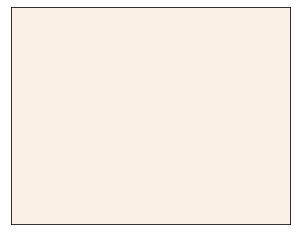

In [83]:
#map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
#map.drawcounties() # you can even add counties (and other shapefiles!)

{-106.0: ([<matplotlib.lines.Line2D at 0x1bee7212388>],
  [Text(222.38974856936235, -2223.897485693624, '106°W')]),
 -105.5: ([<matplotlib.lines.Line2D at 0x1bee72129c8>],
  [Text(55819.82689090995, -2223.897485693624, '105.5°W')]),
 -105.0: ([<matplotlib.lines.Line2D at 0x1bee7212f88>],
  [Text(111417.26403325054, -2223.897485693624, '105°W')]),
 -104.5: ([<matplotlib.lines.Line2D at 0x1bee79f0208>],
  [Text(167014.70117559112, -2223.897485693624, '104.5°W')])}

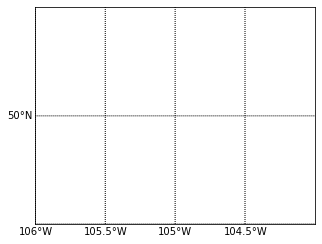

In [84]:
parallels = np.arange(49.5,50.5,.5) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-106,-104,.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

In [87]:
lon

masked_array(
  data=[[-105.803925, -105.80308 , -105.80222 , ..., -105.30278 ,
         -105.301926, -105.30108 ],
        [-105.80392 , -105.80307 , -105.802216, ..., -105.30278 ,
         -105.301926, -105.30107 ],
        [-105.80391 , -105.803055, -105.80221 , ..., -105.30277 ,
         -105.301926, -105.30107 ],
        ...,
        [-105.8002  , -105.799355, -105.79851 , ..., -105.30138 ,
         -105.30053 , -105.29968 ],
        [-105.80019 , -105.79935 , -105.7985  , ..., -105.30138 ,
         -105.30053 , -105.29968 ],
        [-105.800186, -105.79934 , -105.79849 , ..., -105.30137 ,
         -105.30052 , -105.299675]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [97]:
lons,lats= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats)

MemoryError: Unable to allocate 215. GiB for an array with shape (240352, 240352) and data type float32

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

MemoryError: Unable to allocate 53.8 GiB for an array with shape (240352, 240352) and data type bool

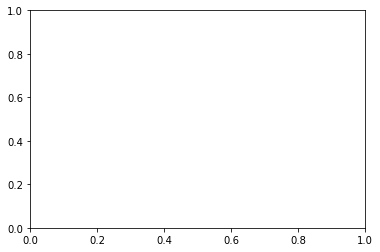

In [96]:
clevs = np.arange(100,60,4)
cs = map.contour(x,y,R[:,:]/100.,clevs,colors='blue',linewidths=1.)

In [90]:
import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping
img = xr.open_dataarray('../S2_img_AC_acolite_2014-2019-2/' + img_list[62])
img.plot()
Shape = geopandas.read_file("..\Data\BPL_shp\Buffalo_Pound.shp", crs="epsg:4326")
Shape.plot()
df = dnc.to_dataframe()

KeyboardInterrupt: 

In [ ]:
import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping


MSWEP_monthly2 = xarray.open_dataarray('D:\G3P\DATA\Models\MSWEP\MSWEP_monthly.nc4')
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = geopandas.read_file('D:\G3P\DATA\Shapefile\Africa_SHP\Africa.shp', crs="epsg:4326")

clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.ap

In [ ]:
img_list[62]

In [ ]:
from netCDF4 import Dataset
#Ref = [[]*0]*0 
#for index, row in merged_data_3daylag.iterrows():
dataset = Dataset('../S2_img_AC_acolite_2014-2019-2/' + img_list[62])
keys = dataset.variables.keys()
dataset_1D = {}
for key in keys:
    dataset_1D[key] = dataset.variables[key][:].flatten()
    


In [ ]:
Ref = [[]*0]*0 
for i in range(0,len(dataset_1D['lat'])):
    if dataset_1D['l2_flags'][i] == 0:
        Rrs = []
        for key in keys:
            if 'Rrs' in key:        
                Rrs.append(dataset_1D[key][i])
        Ref.append(Rrs)
        
ww = (np.array(Ref))   
ww = ww[:, :6]

In [ ]:
ww

In [ ]:
# from sklearn.preprocessing import scale 
# ww_scaled = scale(ww)
# ww_scaled

In [ ]:
def reject_outliers(data, m):
    return abs(data - np.median(data)) > m * np.std(data)

idx = ww.copy()
for i in range(0, ww.shape[1]):
    data = ww[:,i]
    idx[:,i] = reject_outliers(data, 2)

idx_outlier = idx.sum(axis=1) != 0

In [ ]:
sum(idx_outlier)

In [ ]:
ww

In [ ]:
model.fit(X, y_trans_log10)
values_pred = model.predict(ww)
idx_values_pred_outlier = reject_outliers(values_pred, 2)
values_pred[idx_values_pred_outlier] = 'NaN'
values_pred_unlog = 10 ** values_pred
values_pred_unlog[idx_outlier] = 'NaN'


In [ ]:
sum(idx_values_pred_outlier)

In [ ]:
image_flat = np.array(dataset_1D['Rrs_492']) 
idx = np.isnan(image_flat)
image_flat[~idx]= values_pred_unlog

In [ ]:
image = image_flat.reshape(dataset.dimensions['y'].size, dataset.dimensions['x'].size)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.figure(figsize = [16,12])
heatmap = plt.imshow(image, cmap='jet', interpolation='nearest')

cbar = plt.colorbar(heatmap, cax = ax.add_axes([.15, 0.15, 0.03, 0.7]))
cbar.ax.tick_params(labelsize=20) 

In [ ]:
ax.savefig('SVR_62.png',dpi=500, format='png')